# Get Started
Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

    1= Malignant (Cancerous) - Present
    0= Benign (Not Cancerous) -Absent


The Breast Cancer datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

+ The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.
+ The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

------------------------------------------

## Objective:

The repository is a learning exercise to:

- Apply the fundamental concepts of machine learning from an available dataset

The analysis is divided into four sections, saved in juypter notebooks in this repository

1. Identifying the problem and Data Sources
2. Data Explorations
3. Data Pre-Processing
4. Model Development
5. Model Improvement


In [1]:
# check Environments version 
# --------------------------
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 2.7.13 |Anaconda custom (64-bit)| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
scipy: 1.0.0
numpy: 1.13.3
matplotlib: 2.0.2
pandas: 0.21.0
sklearn: 0.19.1


---------------------------------------------------------------
# 1.  Identifying the problem and Getting data.

Identify the types of information contained in our data set In this notebook I used Python modules to import external data sets for the purpose of getting to know/familiarize myself with the data to get a good grasp of the data and think about how to handle the data in different ways. 

--------------------------------------------------------

### A. Import library

First, let’s import all/ minimum of the modules, functions and objects we are going to use in this tutorial



### B. Load Dataset

First, load the supplied CSV file using additional options in the Pandas read_csv function.
Inspecting the data or We can load the data directly from the UCI Machine Learning repository in sklearn.

The first step is to visually inspect the new data set. There are multiple ways to achieve this:

* The easiest being to request the first few records using the DataFrame data.head()* method. By default, “data.head()” returns the first 5 rows from the DataFrame object df (excluding the header row).
* Alternatively, one can also use “df.tail()” to return the five rows of the data frame.
* For both head and tail methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method.Inspecting the data

In [2]:
# A. Import library 
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

In [3]:
# B. Load Dataset
dataset=load_breast_cancer()
print dataset.DESCR


Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

-------------------------------------------
# 2. Data Explorations

Goal : Explore the variables to assess how they relate to the response variable In this notebook, I am getting familiar with the data using data exploration and visualization techniques using python libraries (Pandas, matplotlib, seaborn. Familiarity with the data is important which will provide useful knowledge for data pre-processing)


### Statistical Summary

Now we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.

In [4]:
# we use pandas as container the data
# set to pandas
pd_dataset=pd.DataFrame(dataset.data)
pd_dataset.columns= dataset.feature_names

# global name X,y for simple name
X= pd_dataset
y=dataset.target
print pd_dataset.describe()
print pd_dataset.head()

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

/home/nodeflux/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


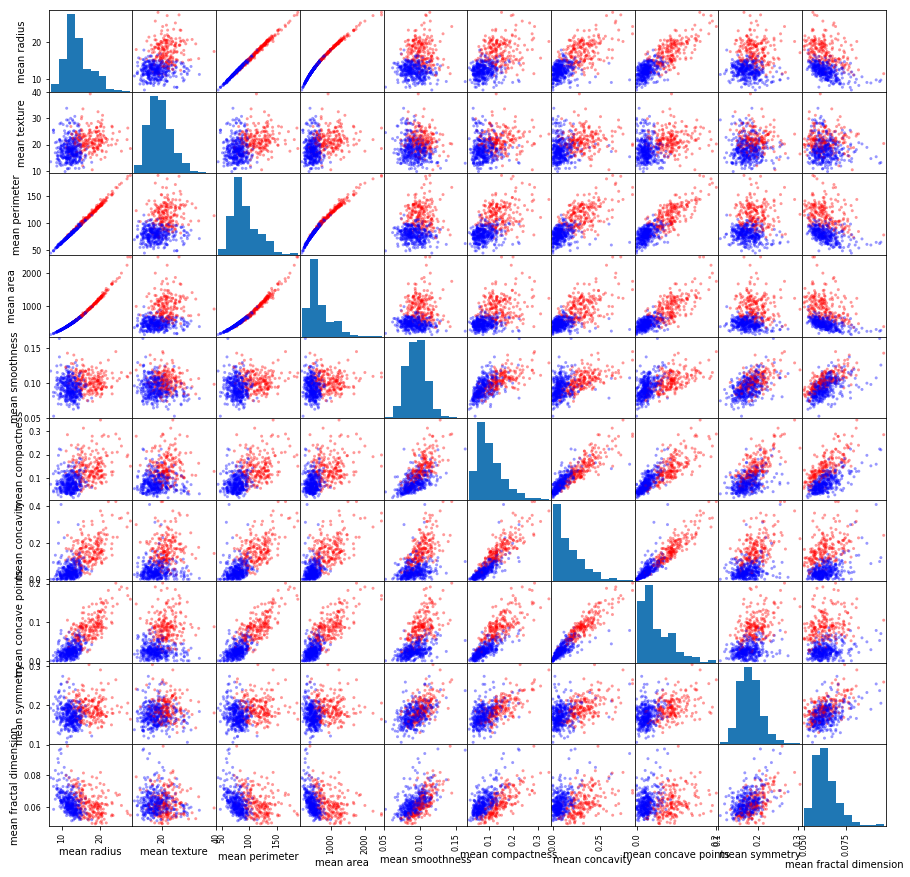

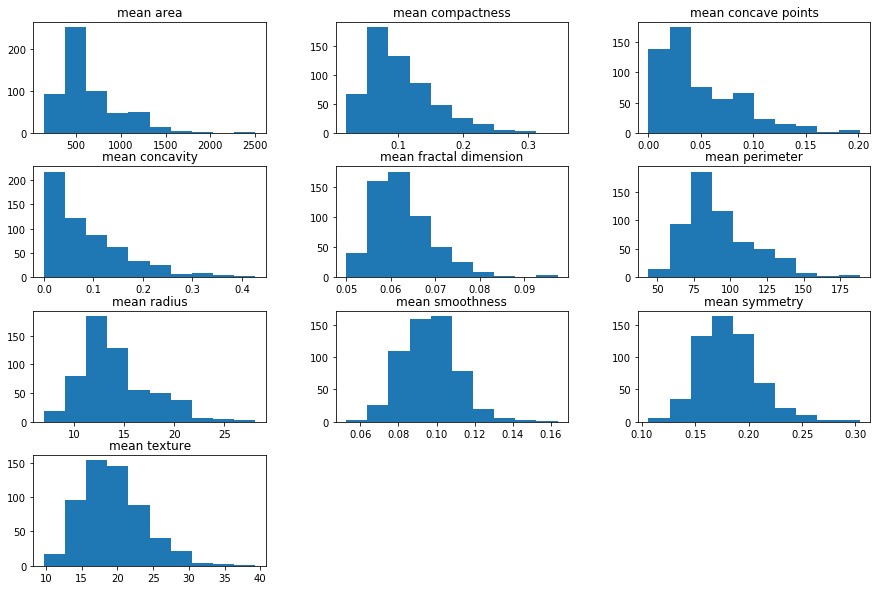

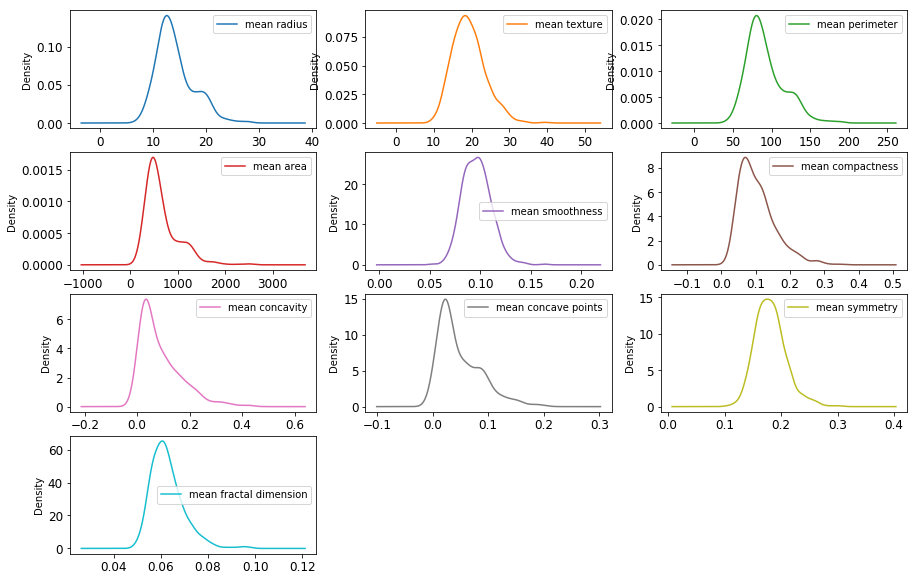

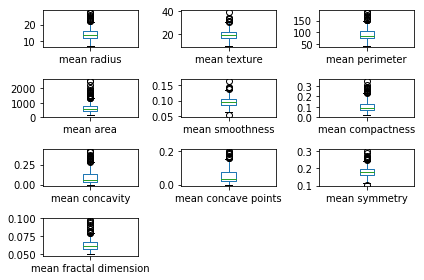

In [5]:
# summirize dataset using matplotlib
from matplotlib import pyplot as plt
color_dic = {0:'red', 1:'blue'}
#Plot histograms of CUT1 variables
data_mean=pd_dataset.iloc[:,0:10]

# colors = pd_dataset['class'].map(lambda x: color_dic.get(x))
colors= [color_dic.get(c) for c in y]

sm = pd.scatter_matrix(data_mean, c=colors, alpha=0.4, figsize=((15,15)));
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

#Density Plots
data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

data_mean.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()



----------------------------------------
# 3. Data Preprocessing

Data preprocessing is a crucial step for any data analysis problem. It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.This involves a number of activities such as:
- Assigning numerical values to categorical data;
- Handling missing values; and
- Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).

Goal : Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model. 

*) We assume that the dataset for this project is clean. So we not do preprocessing right now

--------------------------------

In this sections to improve the models, I use  some techniques, that are :
1. feature normalization
2. feature selection to reduce high-dimension data

### Feature Normalization


In [6]:
# # Data pre-processing

# from sklearn.preprocessing import StandardScaler
# data_scaler=StandardScaler()
# Xs=data_scaler.fit_transform(X)

### Feature Reduction using PCA


In [7]:
# # feature selection and feature reduction

# from sklearn.decomposition import PCA
# import numpy as np
# # feature extraction
# pca = PCA(n_components=10)
# X_reduc = pca.fit_transform(Xs)

# # summarize components
# print("Explained Variance: %s") % (sum(pca.explained_variance_ratio_))

# #The amount of variance that each PC explains
# var= pca.explained_variance_ratio_
# #Cumulative Variance explains
# var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)              
# print(var1)
# X=X_reduc

# # Deciding How Many Principal Components to Retain
# # - Kaiser’s criterion,Elbow
# # - screeplot
# plt.plot(pca.explained_variance_)
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Eigenvalue')

# leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
# leg.get_frame().set_alpha(0.4)
# leg.draggable(state=True)
# plt.show()


----------------------------------------------------------
# 4. Models Development 

In this section of the project, you will develop the tools and techniques necessary for models to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 3 different algorithms:
- KNeighborsClassifier,
- DecisionTreeClassifier,
- RandomForestClassifier,
- GaussianNB,     
- SVM,


----------------------------------------------------------
### A. Split Data
Before build the models, the next implementation requires that you take the dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:

- Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data into training and testing sets.
- Split the data into 75% training and 25% testing.
- Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.
    Assign the train and testing splits to X_train, X_test, y_train, and y_test.


### B. Models Validation

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the accuracy_score function to computes the accuracy. the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


### C. Cross validation
Cross Validation technique  assess the performance of machine learning models. It helps in knowing how the machine learning model would generalize to an independent data set. 
Tthis is one of resampling methods to make the best use of your training data in order to accurately estimate the performance of a model on new unseen data.


Accurate estimates of performance can then be used to help you choose which set of model parameters to use or which model to select. Once you have chosen a model, you can train for final model on the entire training dataset and start using it to make predictions.



In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# initialization method classifier
classifier=[
        KNeighborsClassifier(5),
        DecisionTreeClassifier(),
        RandomForestClassifier(),        
        GaussianNB(),             
        SVC(probability=True, C=100)       
    
]

In [9]:
import time
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score,KFold

accuracy_all = []
cvs_all = []
names=[]

for clf in classifier:
    start = time.time()
    name= clf.__class__.__name__
    
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    kfold = KFold(n_splits=10, random_state=42)
    scores = cross_val_score(clf, X, y, cv=kfold)
    predict_score=accuracy_score(prediction, y_test)

    end = time.time()
    print("Execution time: {0:.5} seconds \n".format(end-start))
    
    accuracy_all.append(predict_score)
    cvs_all.append(np.mean(scores))
    names.append(name)
    
    
    print(name, "Classifier Accuracy: {0:.2%}".format(predict_score))
    print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
#     print (classification_report(prediction, y_test))
   

Execution time: 0.024704 seconds 

('KNeighborsClassifier', 'Classifier Accuracy: 96.50%')
Cross validation score: 92.63% (+/- 9.25%)
Execution time: 0.075003 seconds 

('DecisionTreeClassifier', 'Classifier Accuracy: 93.01%')
Cross validation score: 93.50% (+/- 5.66%)
Execution time: 0.28246 seconds 

('RandomForestClassifier', 'Classifier Accuracy: 95.80%')
Cross validation score: 95.96% (+/- 4.97%)
Execution time: 0.01569 seconds 

('GaussianNB', 'Classifier Accuracy: 95.80%')
Cross validation score: 93.68% (+/- 7.22%)
Execution time: 0.82014 seconds 

('SVC', 'Classifier Accuracy: 62.24%')
Cross validation score: 62.77% (+/- 35.40%)


In [10]:
#create report to pandas

data={'accuracy': accuracy_all, 'cross val':cvs_all }
pd_data=pd.DataFrame(data)
pd_data.index=names
print pd_data


                        accuracy  cross val
KNeighborsClassifier    0.965035   0.926253
DecisionTreeClassifier  0.930070   0.934994
RandomForestClassifier  0.958042   0.959618
GaussianNB              0.958042   0.936779
SVC                     0.622378   0.627663


-------------------------------------------------------------
# 5. Model Improvement


Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model. 
In this project I use two sub step to improve the accuracy the best model, that are: 

1. Preprocessing : We use feature selection to reduce high-dimension data, feature extraction and transformation for dimensionality reduction
2. parameters tuning  in order to find one with the best model's performance with best parameters ( hyper-parameters). 

Note : Machine learning models are parameterized so that their behavior can be tuned for a given problem.
Models can have many parameters and finding the best combination of parameters can be treated as a search problem. Not all parameters of a classifier is learned from the estimators. Those parameters are called hyper-parameters and are passed as arguments to the constructor of the classifier. Each estimator has a different set of hyper-parameters, which can be found in the corresponding documentation.
We can search for the best performance of the classifier sampling different hyper-parameter combinations. This will be done with an exhaustive grid search, provided by the GridSearchCV function.




In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## SVM tune parameters

In [ ]:

print('--------- Now Trying Support Vector Machine Classifier ---------')

#Tune Hyperparameters
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'C': param_range,
               'kernel': ['linear']},
              {'C': param_range,
               'gamma': param_range,
               'kernel': ['rbf']}]
clf = GridSearchCV(estimator= SVC(probability=True),
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=1)

prediction = clf.fit(X_train, y_train)
end = time.time()

scores = cross_val_score(clf, X, y, cv=5)


print("Support Vector Machine Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))
print("Best parameters: {0} \n".format(clf.best_params_))

--------- Now Trying Support Vector Machine Classifier ---------


## Random Forest Classifier tune parameters

In [ ]:
print('--------- Now Trying Support Random Forest Classifier ---------')
start = time.time()

parameters = {'n_estimators':list(range(70,101)), 'criterion':['gini', 'entropy']}

clf = GridSearchCV(RandomForestClassifier(), parameters, scoring = 'accuracy', n_jobs=4)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))
print("Best parameters: {0} \n".format(clf.best_params_))

## Naive Bayes Classifier tune parameters

In [ ]:
print('--------- Now Trying Support Naive Bayes Classifier  ---------')
start = time.time()

parameters = {'priors':[[0.01, 0.99],[0.1, 0.9], [0.2, 0.8], [0.25, 0.75], [0.3, 0.7],[0.35, 0.65], [0.4, 0.6]]}

clf = GridSearchCV(GaussianNB(), parameters, scoring = 'accuracy', n_jobs=1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))
print("Best parameters: {0}".format(clf.best_params_))

---------------------------
### Example : Saving the best model

In [ ]:
# from sklearn.externals import joblib
# joblib.dump(data_scaler, 'data_scaler_cancer.pkl')
# joblib.dump(pca, 'pca_cancer.pkl')
# joblib.dump(clf_svc, 'svc_cancer.pkl')

### Example : Load the model

In [ ]:
# # load model:
# # 1.standard
# # 2. pca
# # 3. algorithm
# svm= joblib.load('svc_cancer.pkl')
# predict=svm.predict(X_test)
# print 'Score :',accuracy_score(predict,y_test)

# svm= joblib.load('lr_cancer.pkl')
# predict=svm.predict(X_test)
# print 'Score :',accuracy_score(predict,y_test)
